In [13]:
import pandas as pd

df_lb1 = pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_raw\labeled_Baomy_tiki.csv")

In [18]:
df_lb2 = pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_raw\labeled_Baomy_tiki2.csv")

In [21]:
df_lb3 = pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_raw\labeled_Baomy_tiki3.csv")

In [25]:
df_lb4 = pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_raw\labeled_Baomy_tiki4.csv")

In [27]:
import pandas as pd


df_lb1 = pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_raw\labeled_Baomy_tiki.csv")
df_lb2 = pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_raw\labeled_Baomy_tiki2.csv")
df_lb3 = pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_raw\labeled_Baomy_tiki3.csv")
df_lb4 = pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_raw\labeled_Baomy_tiki4.csv")

dfmy = pd.concat([df_lb1, df_lb2, df_lb3,df_lb4], ignore_index=True)

print(dfmy.shape)   # xem kích thước
print(dfmy.head())  # xem vài dòng đầu


(800, 5)
                                             content  rating       created_at  \
0  Đã nhận nồi. Đợi lâu mất mí hôm nhưng bõ công ...       5  Hoàng Minh Minh   
1  Đây là video về nồi cơm điện EJR426 mà tôi nhậ...       5  Hoàng Minh Thái   
2  Nhỏ xinh.\nPhù hợp ở trọ một mình hoặc 2ng.\nĐ...       5        V Musical   
3  Ok càbwfwifwibfbxwxb cơm hơi cháy nên bật ít t...       5       Thùy Dương   
4  Rất hài lòng với sản phầm này của Panasonic. K...       5       Nguyễn Đức   

   thank_count  label  
0            0    pos  
1            1   next  
2            1  other  
3            1  other  
4            7    pos  


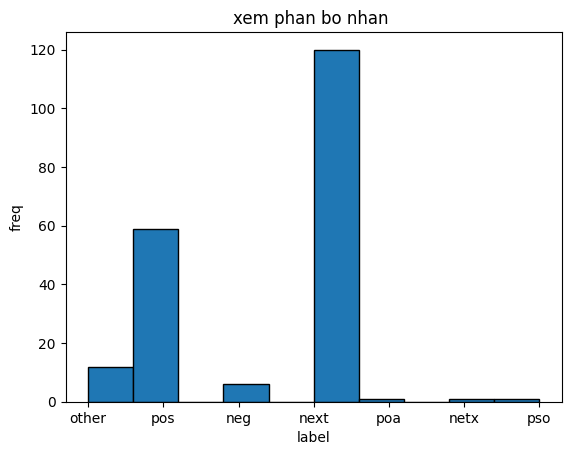

In [26]:
import matplotlib.pyplot as plt 

plt.hist(df_lb4["label"], edgecolor = 'black')
plt.xlabel("label")
plt.ylabel("freq")
plt.title("xem phan bo nhan ")
plt.show()

In [28]:
dfmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   content      467 non-null    object
 1   rating       800 non-null    int64 
 2   created_at   799 non-null    object
 3   thank_count  800 non-null    int64 
 4   label        800 non-null    object
dtypes: int64(2), object(3)
memory usage: 31.4+ KB


-----

In [29]:
dfmy = dfmy.dropna()

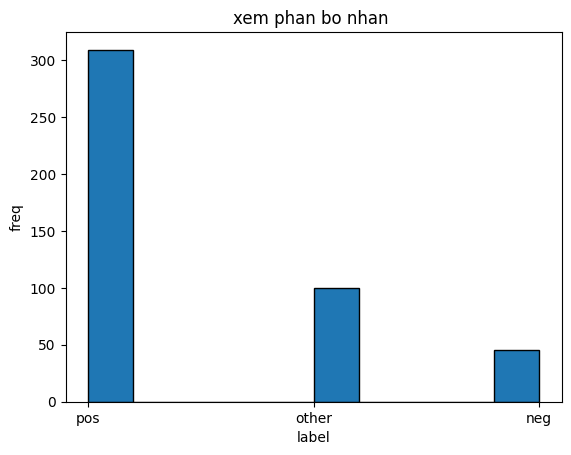

In [33]:
import matplotlib.pyplot as plt 

plt.hist(dfmy["label"], edgecolor = 'black')
plt.xlabel("label")
plt.ylabel("freq")
plt.title("xem phan bo nhan ")
plt.show()

In [32]:
dfmy = dfmy[~dfmy["label"].isin(["poa", "pso", "next"])]

In [ ]:
dfmy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 454 entries, 0 to 786
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   content      454 non-null    object
 1   rating       454 non-null    int64 
 2   created_at   454 non-null    object
 3   thank_count  454 non-null    int64 
 4   label        454 non-null    object
dtypes: int64(2), object(3)
memory usage: 21.3+ KB


imbalance => oversampling

---------

In [7]:
#độ dài trung bình ( kí tự , từ )

df["len_ki_tu"] = df["content"].astype(str).apply(len)
df["len_word"] = df["content"].astype(str).apply(lambda x : len(x.split()))

In [8]:
df.head()

,content,rating,created_at,thank_count,len_ki_tu,len_word
0,Đã nhận nồi. Đợi lâu mất mí hôm nhưng bõ công ...,5,Hoàng Minh Minh,0,410,100
1,Đây là video về nồi cơm điện EJR426 mà tôi nhậ...,5,Hoàng Minh Thái,1,204,46
2,Nhỏ xinh.\nPhù hợp ở trọ một mình hoặc 2ng.\nĐ...,5,V Musical,1,506,119
3,Ok càbwfwifwibfbxwxb cơm hơi cháy nên bật ít t...,5,Thùy Dương,1,59,10
4,Rất hài lòng với sản phầm này của Panasonic. K...,5,Nguyễn Đức,7,282,61


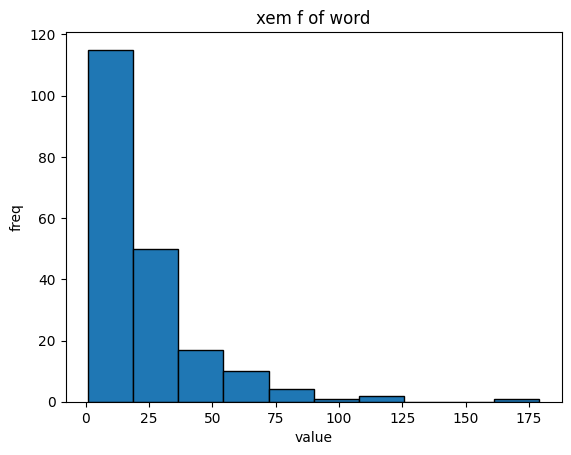

In [10]:
import matplotlib.pyplot as plt

plt.hist(df["len_word"], edgecolor = 'black')
plt.xlabel("value")
plt.ylabel("freq")
plt.title("xem f of word")
plt.show()

outlier : 175 words 